In [1]:
%matplotlib inline

In [2]:
import os
import sys
import glob

import matplotlib.ticker
import pandas

ADD_PATH = os.path.join(os.getcwd(), "..", "bin")
if ADD_PATH not in sys.path:
    sys.path.append(ADD_PATH)

from summarize_bw import parse_results

In [3]:
FILE_SYSTEMS = {"coribb": "288x DataWarp", "perlmutter": "1x E1000 OST", "cgpu": "1x VAST DBox"}
BENCHMARKS = ["elbencho", "ior"]

In [4]:
bw_df = None

for file_system in FILE_SYSTEMS:
    for benchmark in BENCHMARKS:
        results_files = glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "bw-direct*.out"))
        results_files += glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "bw-direct*.csv"))
        print(file_system, benchmark, len(results_files))
        results = parse_results(results_files, fs=file_system, benchmark=benchmark)
        _tmp = pandas.DataFrame.from_records(results)
        if bw_df is None:
            bw_df = _tmp
        else:
            bw_df = pandas.concat([bw_df, _tmp], axis=0)

coribb elbencho 33
coribb ior 9
perlmutter elbencho 36
perlmutter ior 9
cgpu elbencho 21
cgpu ior 7


coribb
perlmutter
cgpu


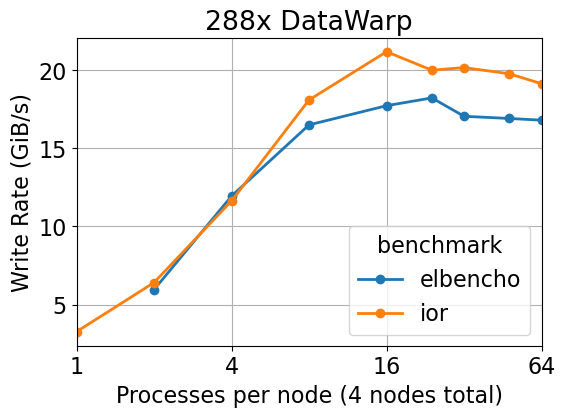

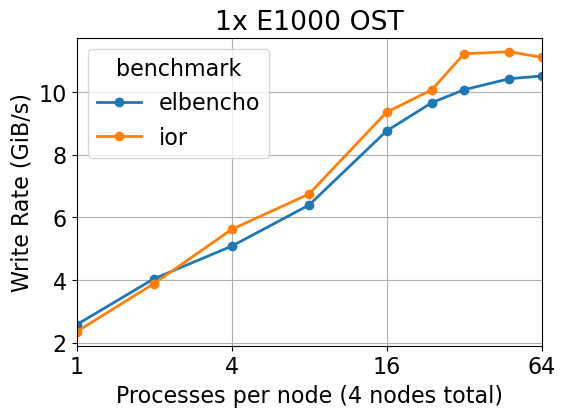

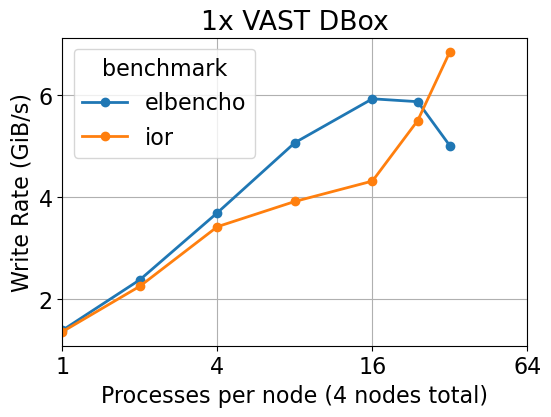

In [5]:
for file_system in FILE_SYSTEMS:
    print(file_system)
    try:
        plot_df = bw_df[bw_df['fs'] == file_system].pivot(index="ppn", columns="benchmark", values="bw(mib/s)") / 1024.0
    except ValueError:
        print(bw_df[bw_df['fs'] == file_system])
        continue
    #ax = plot_df.plot.bar(width=0.8, edgecolor='black')
    ax = plot_df.plot(lw=2, marker='o')
    ax.set_title(FILE_SYSTEMS.get(file_system, file_system))
    ax.set_ylabel("Write Rate (GiB/s)")
    ax.set_xlabel("Processes per node (4 nodes total)")
    ax.set_axisbelow(True)
    ax.grid(visible=True, which='both')
    ax.set_xlim(bw_df["ppn"].min(), bw_df["ppn"].max())
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_locator(matplotlib.ticker.LogLocator(base=2))
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0f}"))


In [6]:
iops_df = None

for file_system in FILE_SYSTEMS:
    for benchmark in BENCHMARKS:
        results_files = glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "iops-direct*.out"))
        results_files += glob.glob(os.path.join("..", f"results.{file_system}", f"{benchmark}-scaling", "iops-direct*.csv"))
        print(file_system, benchmark, len(results_files))
        results = parse_results(results_files, fs=file_system, benchmark=benchmark)
        _tmp = pandas.DataFrame.from_records(results)
        if iops_df is None:
            iops_df = _tmp
        else:
            iops_df = pandas.concat([iops_df, _tmp], axis=0)
iops_df

coribb elbencho 28
coribb ior 7
perlmutter elbencho 0
perlmutter ior 0
cgpu elbencho 21
cgpu ior 0


,label,ppn,bw(mib/s),iops,fs,benchmark
0,Direct I/O,4,397.00,101758.00,coribb,elbencho
1,Direct I/O,24,801.00,205216.00,coribb,elbencho
2,Direct I/O,1,110.00,28256.00,coribb,elbencho
3,Direct I/O,2,208.00,53276.00,coribb,elbencho
4,Direct I/O,8,656.00,168122.00,coribb,elbencho
5,Direct I/O,32,772.00,197768.00,coribb,elbencho
6,Direct I/O,16,792.00,202978.00,coribb,elbencho
0,Direct I/O,24,707.17,181036.25,coribb,ior
1,Direct I/O,32,703.60,180121.05,coribb,ior
2,Direct I/O,4,349.16,89384.63,coribb,ior


coribb
benchmark  elbencho        ior
ppn                           
1            28.256   19.87399
2            53.276   43.65126
4           101.758   89.38463
8           168.122  154.46015
16          202.978  186.38026
24          205.216  181.03625
32          197.768  180.12105


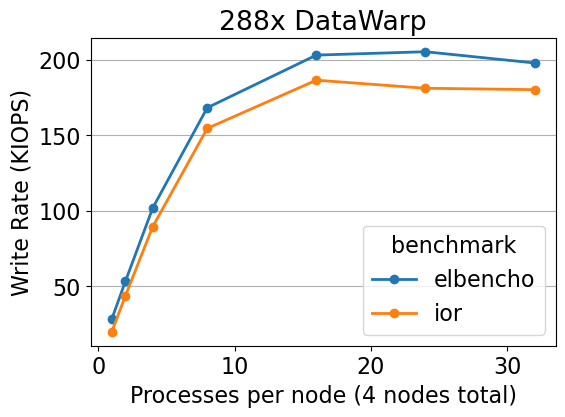

In [7]:
for file_system in ['coribb']:
    print(file_system)
    try:
        plot_df = iops_df[iops_df['fs'] == file_system].pivot(index="ppn", columns="benchmark", values="iops") / 1000.0
    except ValueError:
        print(iops_df[iops_df['fs'] == file_system])
        continue
    #ax = plot_df.plot.bar(width=0.8, edgecolor='black')
    ax = plot_df.plot(lw=2, marker='o')
    ax.set_title(FILE_SYSTEMS.get(file_system, file_system))
    ax.set_ylabel("Write Rate (KIOPS)")
    ax.set_xlabel("Processes per node (4 nodes total)")
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, which="major")
    print(plot_df)